In [13]:
# default_exp map

In [14]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [15]:
# If the graph do not display, try :
#!jupyter labextension install jupyterlab-plotly@4.7.1

# Module to display the data on a map

In [16]:
# export
import plotly.graph_objects as go

In [17]:
# export
def build_sounding_scatter(df_sounding, gaussian_param, with_dash = False):
    sounding_plot = {
            'data': [
                go.Scatter(
                    x=df_sounding['distance'],
                    y=df_sounding['xco2'],
                    text='xco2',
                    mode='markers',
                    opacity=0.5,
                    marker={
                        'size': 5,
                        'line': {'width': 0.5, 'color': 'white'}
                    },
                    name="xco2"
                ),
                go.Scatter(x=df_sounding['distance'], y=df_sounding['gaussian_y'], name="Gaussian fit",
                    hoverinfo='name',
                    line_shape='spline')
            ],
            'layout': go.Layout(
                xaxis={'title': 'Distance (km)'},
                yaxis={'title': 'CO² level in ppm'},
                #margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
                legend={'x': 0, 'y': 1},
                hovermode='closest'
            )
        }
    return sounding_plot

In [18]:
from oco2peak.datasets import Datasets
from oco2peak import find_peak
import re
import plotly.io as pio
import json

config_file = './configs/config.json'
# Load config
with open(config_file) as json_data_file:
    config = json.load(json_data_file)
datasets = Datasets(config_file)
url_month = datasets.get_files_urls('result_for_oco2_1808')[0]
url_peak = datasets.get_files_urls('peak_data-si_2018082505')[0]
print(url_peak)
df_month = datasets.get_dataframe(url_month)
#df_month.head(3)
df_peak = datasets.get_dataframe(url_peak)

https://storage.gra.cloud.ovh.net/v1/AUTH_2aaacef8e88a4ca897bb93b984bd04dd/oco2//datasets/oco-2/peaks-detected-details/peak_data-si_2018082505142073.json


2018082505142073


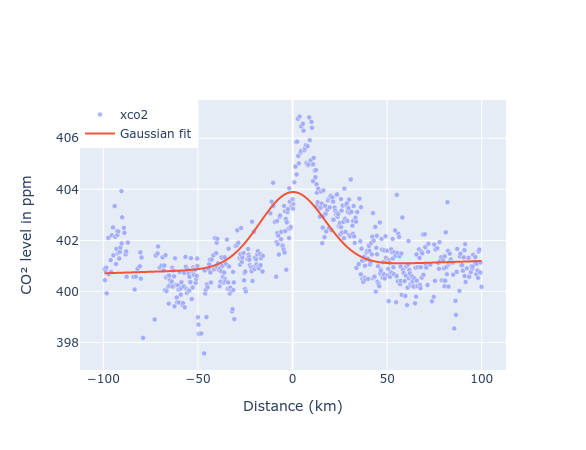

In [19]:

sounding_id = re.findall(r'(\d{16})', url_peak)[-1]
print(sounding_id)
gaussian_param = datasets.get_gaussian_param(sounding_id, df_month)
df_peak['gaussian_y'] = df_peak.distance.apply(
    lambda x: find_peak.gaussian(x=x, m=gaussian_param['slope'], b=gaussian_param['intercept'], A=gaussian_param['amplitude'], sig=gaussian_param['sigma']))

sounding_scatter = build_sounding_scatter(df_peak, gaussian_param, with_dash = False)
pio.show(sounding_scatter)

In [20]:
# export
def build_sounding_map(df_sounding, mapbox_token):
    df = df_sounding
    center_lat = df.latitude.min() + (df.latitude.max() - df.latitude.min())/2
    center_lon = df.longitude.min() + (df.longitude.max() - df.longitude.min())/2
    xco_sounding_mapbox = go.Figure(go.Scattermapbox(
        lat=df.latitude,
        lon=df.longitude,
        mode='markers',
        marker=go.scattermapbox.Marker(
            color = df['xco2'], size=5
        ),
        
        text=df.xco2,
    ))
    xco_sounding_mapbox.update_layout(
        mapbox_style="satellite-streets",
        hovermode='closest',
        mapbox=dict(
            accesstoken=mapbox_token,
            bearing=0,
            center=go.layout.mapbox.Center(
                lat=center_lat,
                lon=center_lon
            ),
            pitch=0,
            zoom=6
        )
    )
    return xco_sounding_mapbox

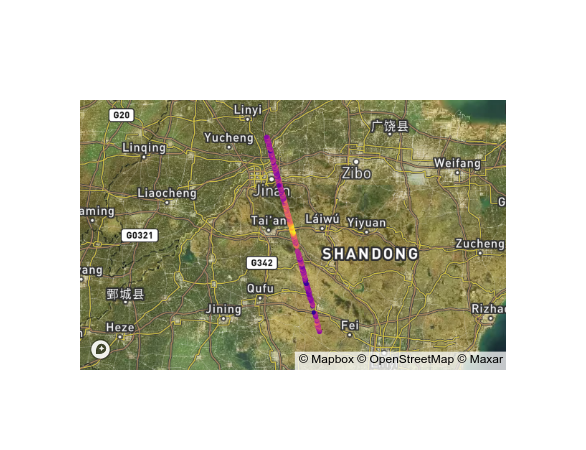

In [21]:
mapbox_token = config['mapbox_token']
sounding_scatter = build_sounding_map(df_peak, mapbox_token)
pio.show(sounding_scatter)

In [22]:
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted datasets.ipynb.
Converted find_peak.ipynb.
Converted index.ipynb.
Converted map.ipynb.
